In [14]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

**Step 0**

Go to the GTSRB dataset official site (link) to learn more about the dataset
[source>>](https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fmeowmeowmeowmeowmeow%2Fgtsrb-german-traffic-sign)

**Step1**

Opening .zip and see what it contains

In [15]:
# Define the folder with homework data
root = 'data'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

**Step2**

Loading the dataset and plot random samples.

Number of training samples: 39209


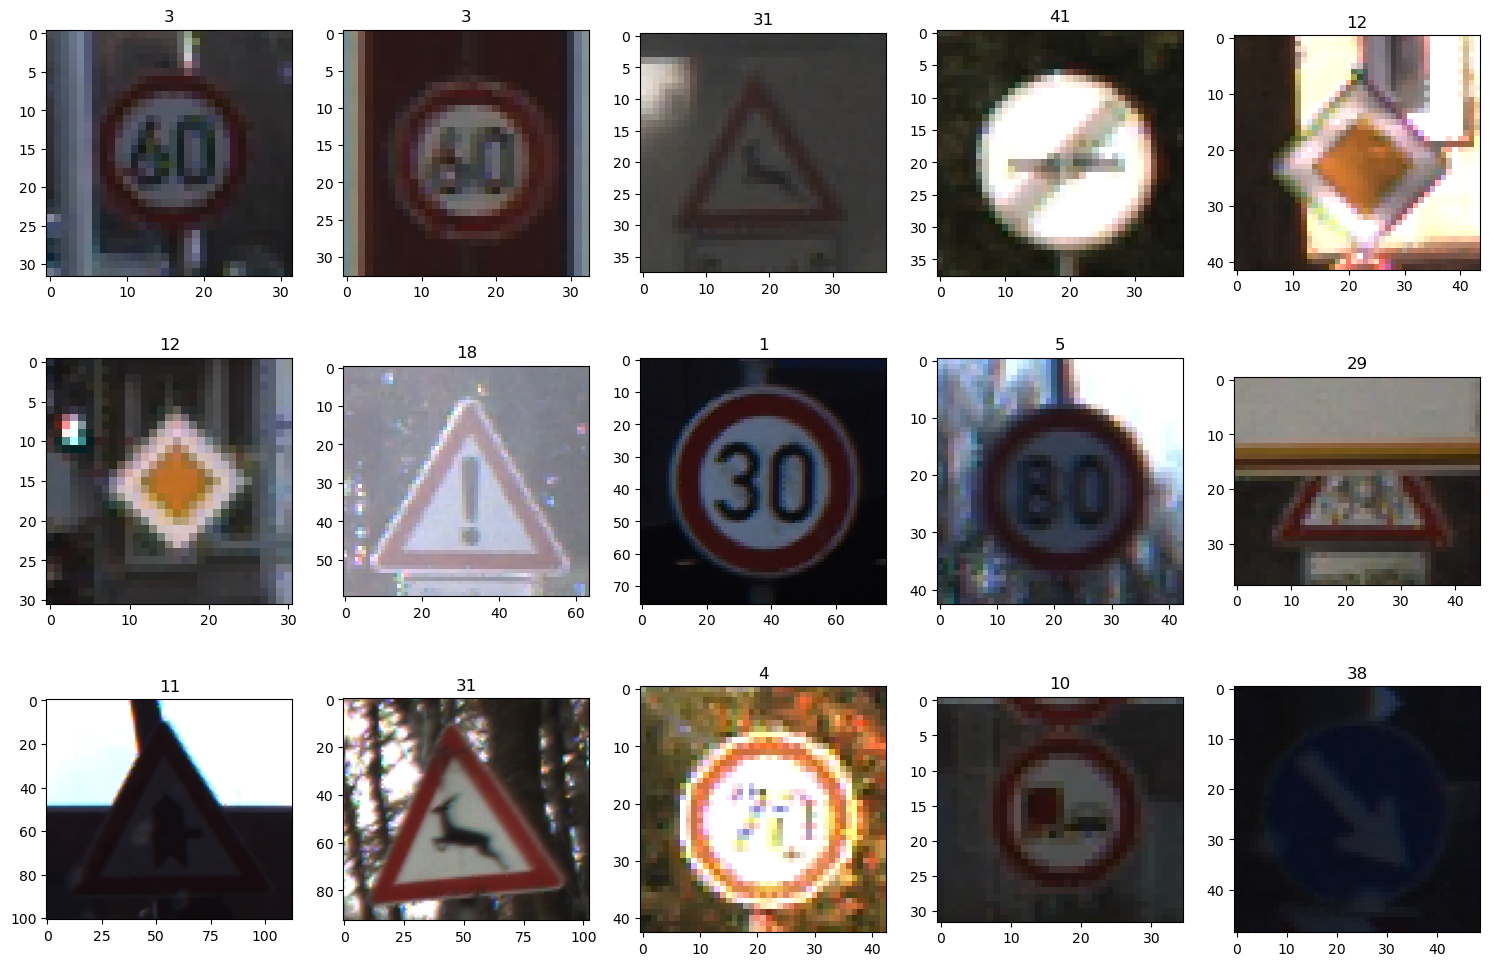

In [16]:
# Number of training samples (amount of samples in data)
num_samples = len(data)
print(f'Number of training samples: {num_samples}')

# Show random data samples
# Keep track of displayed images
displayed_images = 0
for ii in range(num_samples): # Iterate through all samples to find valid images
    if displayed_images >= 15:
        break # Stop after displaying 15 images

    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))

    # Check if the image was loaded successfully
    if img is not None and not img.size == 0:
        # Convert image to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Show image
        plt.subplot(3,5,displayed_images+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])
        displayed_images += 1 # Increment count of displayed images

plt.tight_layout()
plt.show()

**Step 3**

Inspect the dataset by computing and plotting the per-class histogram.

In [17]:
# Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId'].values

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

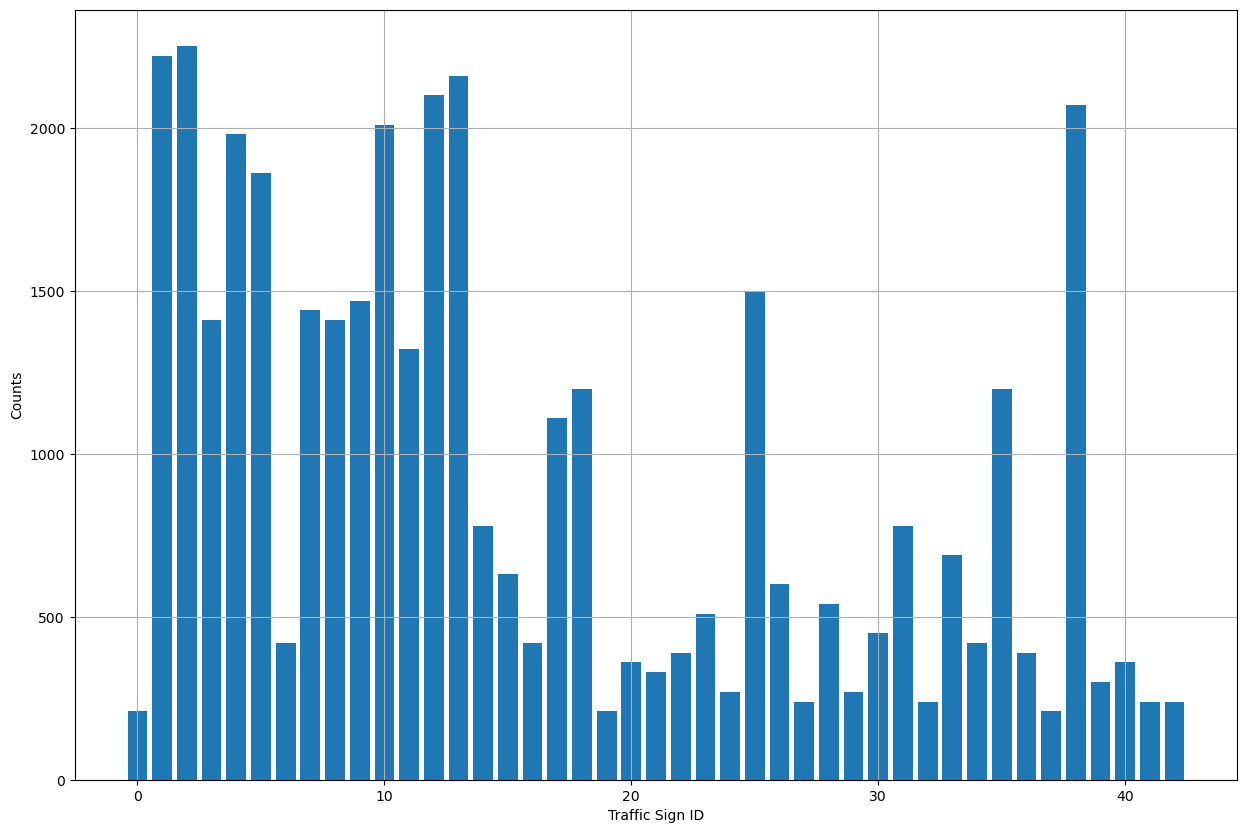

In [18]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

In [19]:
#Number of classes
num_classes = len(hist.keys())

avarage_samples_per_class = num_samples / len(hist.keys())
#Variance
variance = np.var(list(hist.values()))

print(f'Number of samples: {num_samples}')
print(f'Number of classes: {num_classes}')
print(f'Average number of samples per class: {avarage_samples_per_class:.2f}')
print(f'Variance: {variance:.2f}')

Number of samples: 39209
Number of classes: 43
Average number of samples per class: 911.84
Variance: 472955.72


Questions:

- Do you consider the dataset to be balanced? If so, why? If not, why?
Абсолютно не збалансовананий датасет: де-які класи "зашкалюють" (наприлкад 1, 2, 4, 5...), але дуже багато класів із малою кількістю (0, 6, 19, ...)
При загальній кількості 39209 та середньому значенні біля 912 ми маємо кількості від 200 до 2200 семплів для різних класів . Про це говорить дуже велика дисперсія ~473'000


- Are there any classes that are (significantly) over-represented or under-represeneted?
Так і є ( я дав приклади вище)

In [20]:
import seaborn as sns

# --- 1. Отримання даних для розподілу ---
class_counts = list(hist.values())
counts_array = np.array(class_counts)

# --- 2. Розрахунок статистики ---
mean_counts = counts_array.mean()
std_counts = counts_array.std()

print(f"Mean Count: {mean_counts:.2f}")
print(f"Standard Deviation of Counts: {std_counts:.2f}")
print(f"Variance (for reference): {counts_array.var():.2f}")

Mean Count: 911.84
Standard Deviation of Counts: 687.72
Variance (for reference): 472955.72


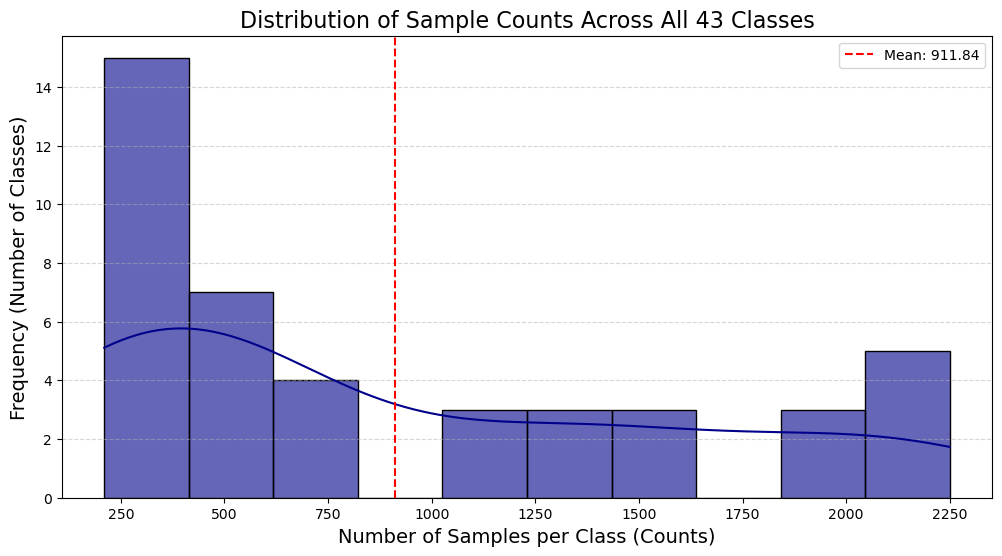

In [21]:
# --- 3. Візуалізація Гістограми та KDE (Гаусового Згладжування) ---

plt.figure(figsize=(12, 6))

# Використовуємо seaborn.histplot для відображення гістограми та KDE
# kde=True накладає криву оцінки щільності ядра, яка імітує Гаусовий розподіл
sns.histplot(
    counts_array,
    bins=10, # Кількість стовпців для гістограми
    kde=True, # Вмикає криву KDE
    color='darkblue',
    edgecolor='black',
    linewidth=1,
    alpha=0.6
)

# Додавання вертикальних ліній для середнього значення та одного стандартного відхилення
plt.axvline(mean_counts, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_counts:.2f}')
# plt.axvline(mean_counts + std_counts, color='green', linestyle=':', linewidth=1)
# plt.axvline(mean_counts - std_counts, color='green', linestyle=':', linewidth=1)

# Налаштування графіку
plt.title('Distribution of Sample Counts Across All 43 Classes', fontsize=16)
plt.xlabel('Number of Samples per Class (Counts)', fontsize=14)
plt.ylabel('Frequency (Number of Classes)', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

**Step 4**

Spatial Resolution & Brigtness variation analysis

In [22]:
from tqdm import tqdm 

print("Starting combined spatial resolution and brightness analysis (one pass)...")

# Списки для збору даних
analysis_data = []

# Використовуємо tqdm навколо data.iterrows() для відображення прогрес-бару
# desc='Processing Images' — це назва, що відображається у барі
for index, row in tqdm(data.iterrows(), total=len(data), desc='Processing Images', colour='blue'):
    # Construct the full image path
    image_path = os.path.join(root, row['Path'])
    
    # 1. Load image
    img = cv2.imread(image_path)
    
    if img is not None:
        # --- A. Spatial Resolution Analysis ---
        # Get height and width (shape is usually (H, W, C))
        h, w = img.shape[:2]

        # --- B. Brightness Analysis ---
        # Convert to HSV (Hue, Saturation, Value)
        # V (Value) component represents brightness
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        
        # Calculate the mean brightness (mean of the V-component at index 2)
        brightness_mean = hsv[:, :, 2].mean()
        
        # Зберігаємо всі зібрані дані
        analysis_data.append({
            'ClassId': row['ClassId'],
            'Height': h,
            'Width': w,
            'Brightness': brightness_mean
        })
    # NOTE: Файл img закриється автоматично, оскільки cv2.imread повертає масив NumPy,
    # і нам не потрібно вручну керувати файловими дескрипторами, як у PIL.


# 2. Перетворення списку на DataFrame для подальшого аналізу
full_analysis_df = pd.DataFrame(analysis_data)
print(f"\nAnalysis complete. Total records collected: {len(full_analysis_df)}")


Starting combined spatial resolution and brightness analysis (one pass)...


Processing Images: 100%|██████████| 39209/39209 [00:11<00:00, 3313.14it/s]


Analysis complete. Total records collected: 39209


Spatial Resolution results


--- Visualizing Resolution Distribution ---

--- Visualizing Resolution Distribution (Width, Height, and Average Area by Class) ---


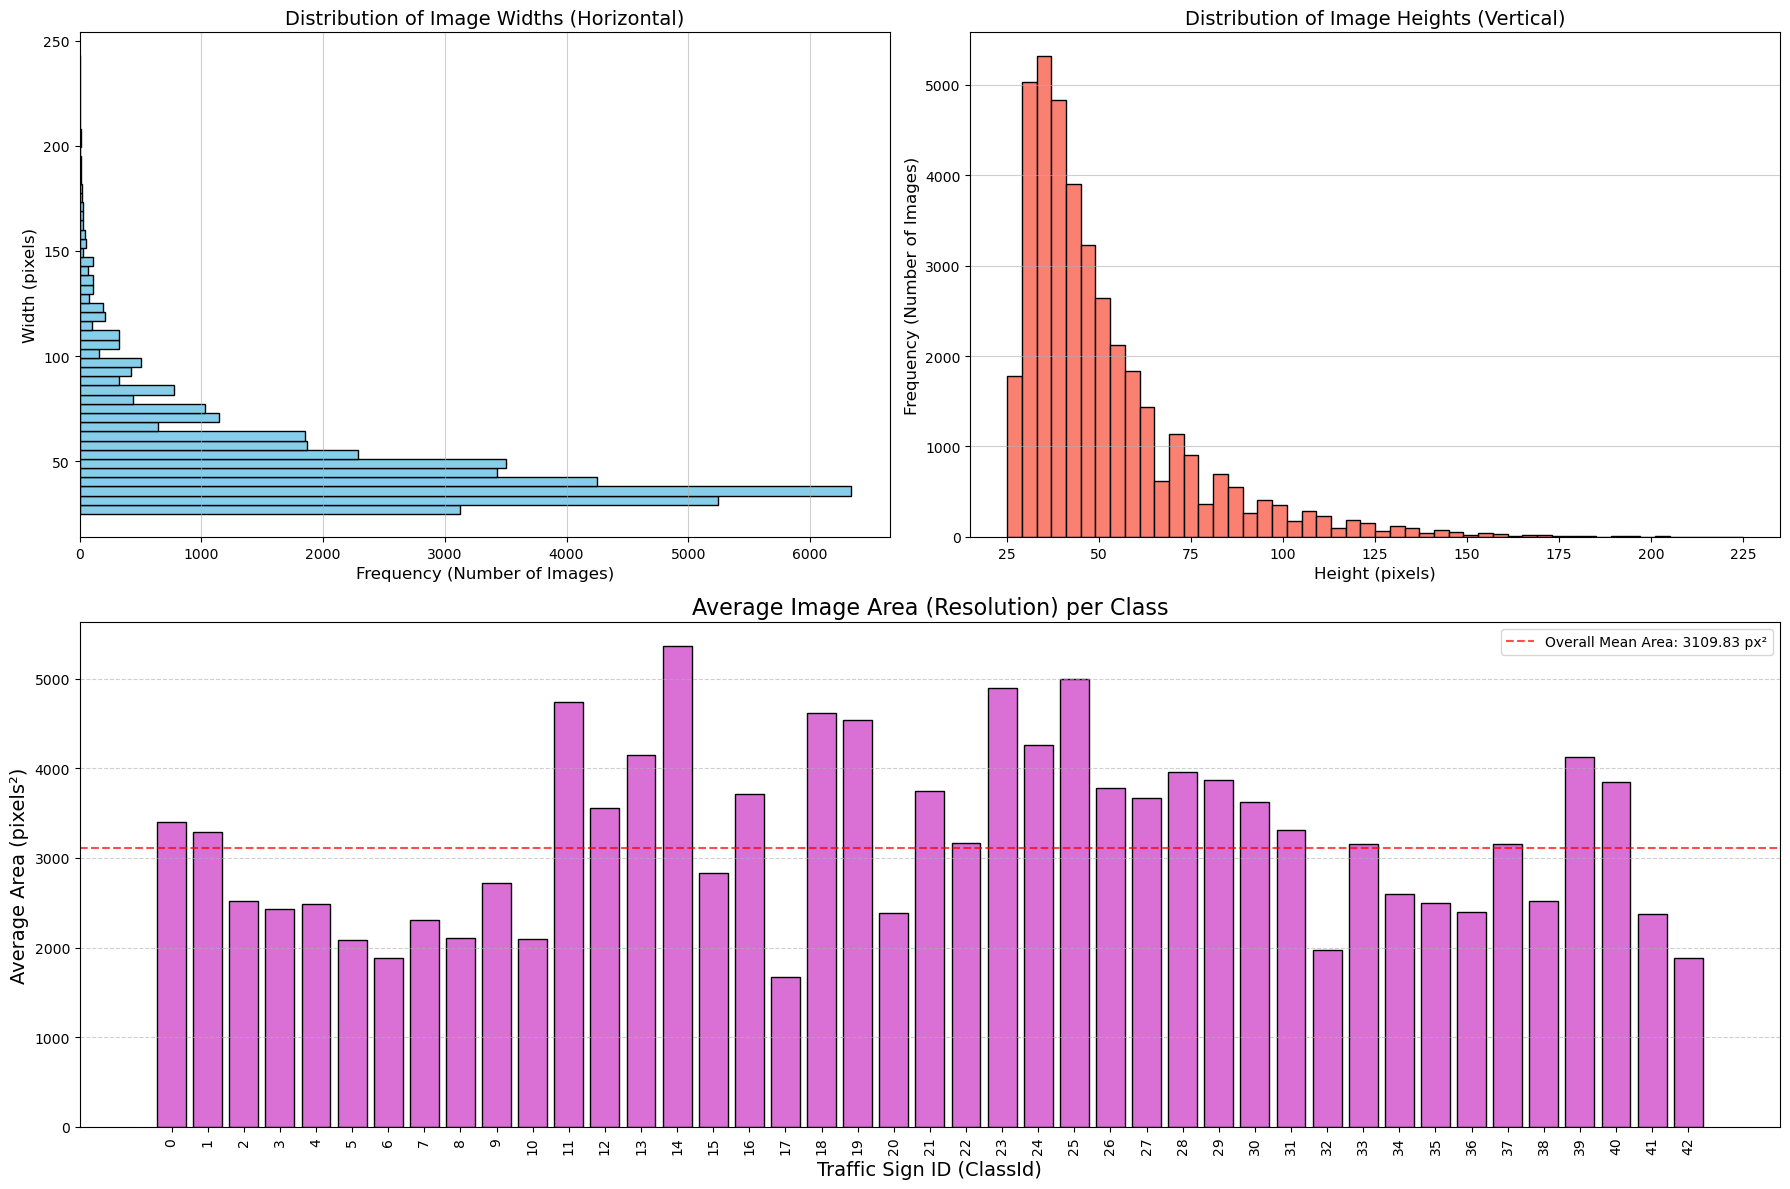

In [35]:
print("\n--- Visualizing Resolution Distribution ---")
# 1. Обчислення площі для кожного зразка
full_analysis_df['Area'] = full_analysis_df['Height'] * full_analysis_df['Width']

# 2. Обчислення середньої площі для КОЖНОГО КЛАСУ (для третього графіка)
class_resolution_mean = full_analysis_df.groupby('ClassId')[['Area']].mean().reset_index()


print("\n--- Visualizing Resolution Distribution (Width, Height, and Average Area by Class) ---")

# Збільшуємо загальний розмір, щоб вмістити три графіки
plt.rcParams['figure.figsize'] = [18, 12] 
fig = plt.figure(figsize=(18, 12))

# Визначаємо макет 2x2: два графіки зверху, один внизу на всю ширину
gs = gridspec.GridSpec(2, 2, figure=fig)

# ====================================================================
# --- Subplot 1: Distribution of Widths (Horizontal Bars) (Верхній лівий) ---
# ====================================================================
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(
    full_analysis_df['Width'], 
    bins=50, 
    color='skyblue', 
    edgecolor='black',
    orientation='horizontal' 
)
ax1.set_title('Distribution of Image Widths (Horizontal)', fontsize=14)
ax1.set_xlabel('Frequency (Number of Images)', fontsize=12)
ax1.set_ylabel('Width (pixels)', fontsize=12)
ax1.grid(axis='x', alpha=0.6) 

# ====================================================================
# --- Subplot 2: Distribution of Heights (Vertical) (Верхній правий) ---
# ====================================================================
ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(full_analysis_df['Height'], bins=50, color='salmon', edgecolor='black')
ax2.set_title('Distribution of Image Heights (Vertical)', fontsize=14)
ax2.set_xlabel('Height (pixels)', fontsize=12)
ax2.set_ylabel('Frequency (Number of Images)', fontsize=12)
ax2.grid(axis='y', alpha=0.6)

# ====================================================================
# --- Subplot 3: Average Area per Class (Нижній, займає всю ширину) ---
# ====================================================================
# gs[1, :] розміщує графік у другому рядку (індекс 1) і на всю ширину (:)
ax3 = fig.add_subplot(gs[1, :]) 

ax3.bar(
    class_resolution_mean['ClassId'],
    class_resolution_mean['Area'],
    color='orchid',
    edgecolor='black'
)

# Додаємо середнє значення по всьому набору даних як референсну лінію
overall_mean_area = full_analysis_df['Area'].mean()
ax3.axhline(overall_mean_area, color='red', linestyle='--', alpha=0.7, label=f'Overall Mean Area: {overall_mean_area:.2f} px²')


ax3.set_title('Average Image Area (Resolution) per Class', fontsize=16)
ax3.set_xlabel('Traffic Sign ID (ClassId)', fontsize=14)
ax3.set_ylabel('Average Area (pixels²)', fontsize=14)
ax3.set_xticks(class_resolution_mean['ClassId'])
ax3.tick_params(axis='x', rotation=90) # Поворот міток X-осі
ax3.legend()
ax3.grid(axis='y', alpha=0.6, linestyle='--')

plt.tight_layout()


- Is there anything we can tell about the resolution distribution?

Розподіл просторової роздільної здатності кращий за розподіл кількості екземплярів кожного класу, є викиди (outliers) як вверх, так і вниз. Але "с'est la vie" - таке воно життя..

Brighness statistics


--- Visualizing Average Brightness per Class ---


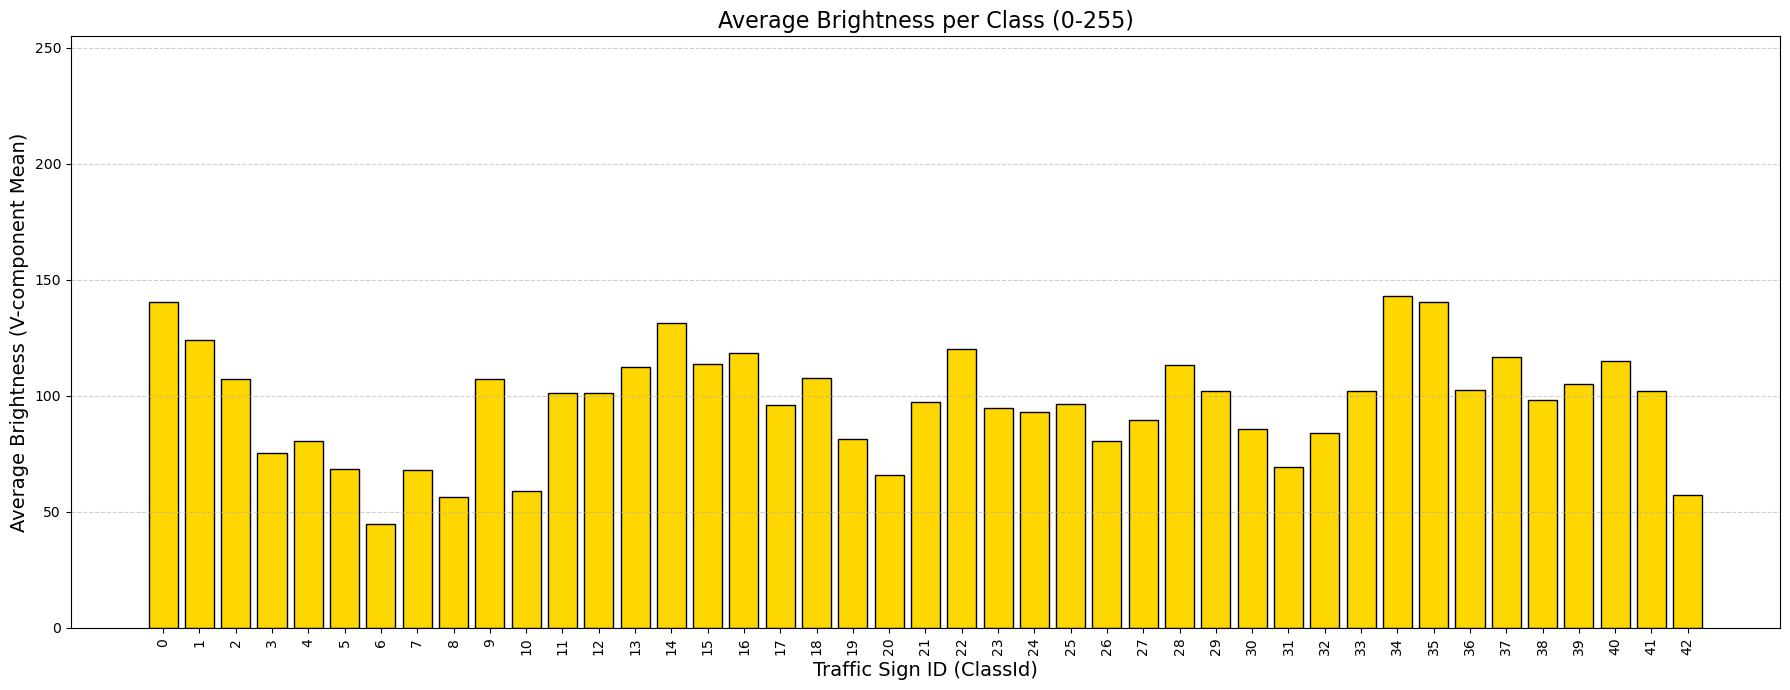

In [36]:
print("\n--- Visualizing Average Brightness per Class ---")

# Обчислення середньої яскравості для КОЖНОГО КЛАСУ
class_brightness_mean = full_analysis_df.groupby('ClassId')['Brightness'].mean().reset_index()

plt.figure(figsize=(18, 7))
plt.bar(
    class_brightness_mean['ClassId'],
    class_brightness_mean['Brightness'],
    color='gold',
    edgecolor='black'
)

# Налаштування графіку
plt.title('Average Brightness per Class (0-255)', fontsize=16)
plt.xlabel('Traffic Sign ID (ClassId)', fontsize=14)
plt.ylabel('Average Brightness (V-component Mean)', fontsize=14)
plt.xticks(class_brightness_mean['ClassId'], rotation=90)
plt.ylim(0, 255) # Яскравість знаходиться в діапазоні 0-255
plt.grid(axis='y', alpha=0.6, linestyle='--')
plt.tight_layout()

- What about the brightness distribution? Are there classes there are significantly more bright than others?

По розподілу яскравості - картина значно краща за раозподіл кількостей екземплярів класів.  Гістограма виглядає значно більш рівномірною. Є де-кілька "поганих овець" (6, 8, 10, ... 42) або дуже якраві (0, 1, 34, 35), але, в принципі, цілком нормально збалансовано яскравість

Але цей аналіз - це про розподіл середньої температурам по палатам лікарні - в межах кожного із класів може бути різна варіативність яскравостей

В обидвох розподілах (resolution і brightness) насправді, усереднення - така собі величина. Хоча, мабуть, для ML це важливий момент для отримання "справедливої" моделі, що зможе однаково якісно розпізнавати різні класи (дорожні знаки)